In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Week 9 Practical

### Q 1
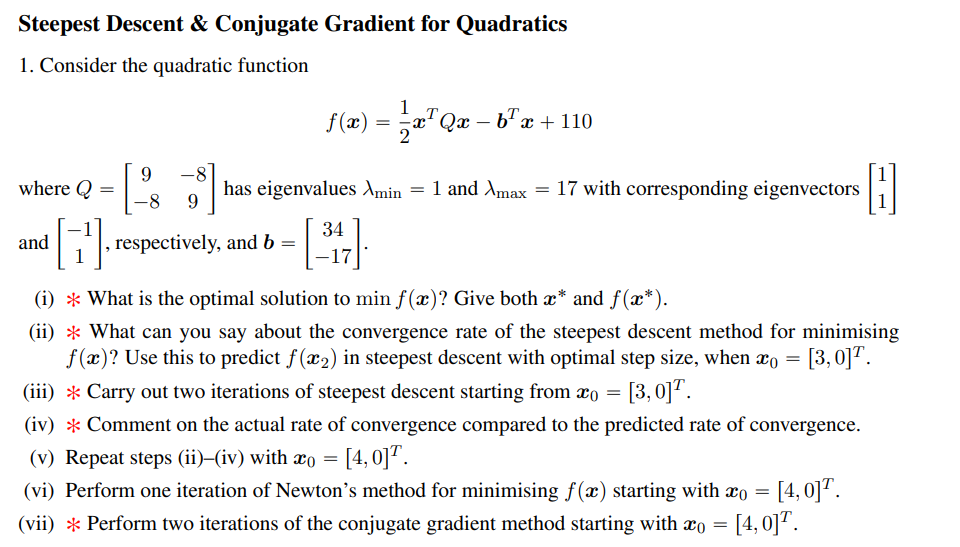

In [2]:
b = np.array([34,-17])
b = b.reshape(2,1)
Q = np.array([[9, -8], [-8, 9]])


def f(x):
    return 1/2*(x.T)@Q@(x) - b.T@(x) + 110


def Fx(xk,xopt):
    return f(xk) - f(xopt)

#### i)

In [3]:
xopt = np.linalg.inv(Q)@b
xopt = xopt.reshape(2,1)
print(xopt, f(xopt)[0])


[[10.]
 [ 7.]] [-0.5]


#### ii)
$$ p = \left (\frac{\lambda_{max}- \lambda_{min}}{\lambda_{max}+ \lambda_{min}} \right )^2 = 0.79$$
The covergance rate $P$ is not great however depending on the initial guess it might converge. Using $x_0 = \left (\begin{matrix}  3 \\ 0\end{matrix} \right )$, the routine converges in 1 iteration.

In [4]:

x0 = np.array([3,0])
x0 = x0.reshape(2,1)
d = (-(Q@x0 - b)).reshape(2,1)
a0 = ((d.T@d)/(d.T@Q@d))[0][0]
x1 = x0 + a0 * d
print(x1)

[[10.]
 [ 7.]]


In [32]:

convegance_ratio = []
x0 = np.array([4,0])
x0 = x0.reshape(2,1)
xk = x0
xk_1 = np.array([1000,1000]).reshape(2,1)
xarr = [x0]

for j in range(30):
    d = (-(Q@xk - b)).reshape(2,1)
    a0 = ((d.T@d)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    xarr.append(xk_1)
    xk = xk_1

xarr= np.array(xarr).squeeze()
print(xarr.shape)

(31, 2)


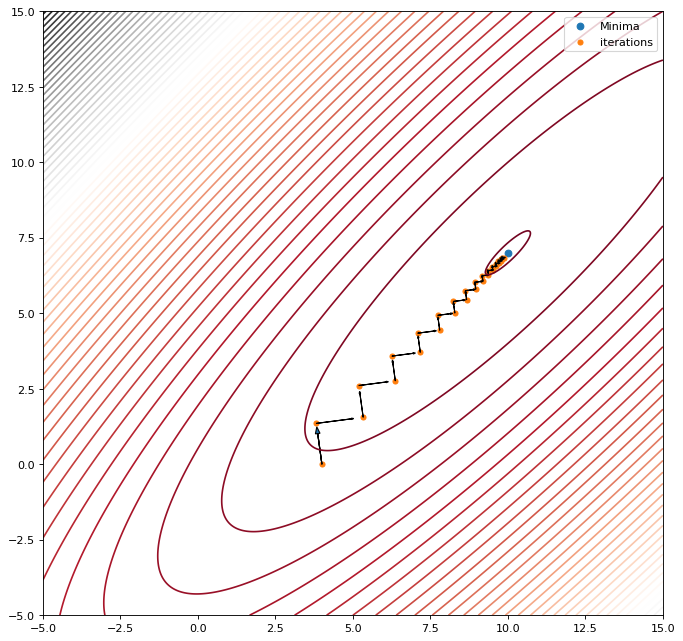

In [6]:
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1])
plt.scatter(xarr[:,0], xarr[:,1], s = 20)
for i in range(xarr[:,0].shape[0]-1):
    plt.arrow(xarr[i,0], xarr[i,1], (xarr[i+1,0] -xarr[i,0] )*0.75,(xarr[i+1,1] -xarr[i,1] )*0.75, head_width=0.05)
plt.arrow(xarr[0,0], xarr[0,1], (xarr[1,0] -xarr[0,0] )*0.75,(xarr[1,1] -xarr[0,1] )*0.75, head_width=0.15)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters1.pdf")


### iv)
The actual covnergance $p_{actual} = 0.778 < 0.79$

In [7]:
actual_convergance = np.array([ Fx(xarr[i+1,:],xopt)/Fx(xarr[i,:],xopt) for i in range(xarr.shape[0]-1)]).ravel()

In [8]:
np.average(actual_convergance)

0.7780866901101025

### v) Using Newton's Method.

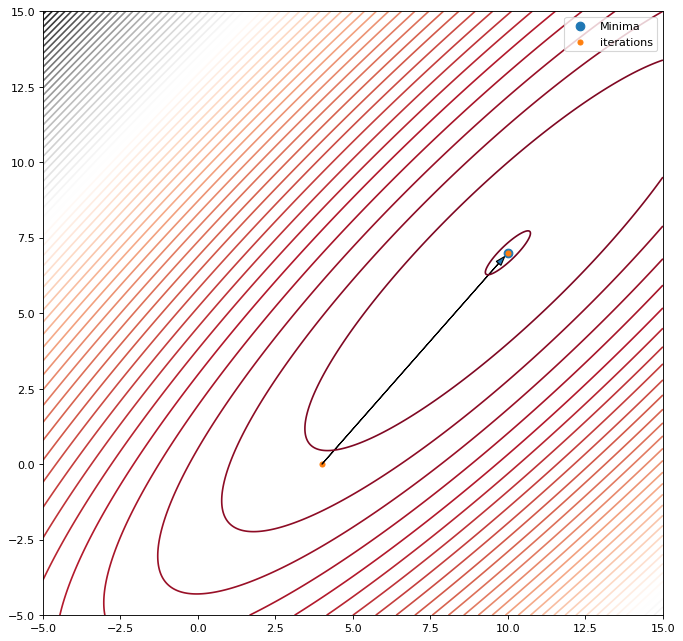

In [37]:
xk = x0
xk1 = x0
xarr2 = [x0]
while np.linalg.norm(Q@xk -b) > 1e-10:
    # Hf = Q.T + Q
    # gradf = (Q@xk - b).reshape(2,1)
    # xk1 = xk - np.linalg.inv(Hf)@gradf
    # xarr2.append(xk1)
    # xk = xk1
    d =np.linalg.inv(Q)@(Q@xk -b)
    al = (-(Q@xk -b).T @ d)/(d.T@Q@d)
    xk1 = xk + al*d
    xarr2.append(xk1)
    xk = xk1 

xarr2= np.array(xarr2).squeeze()

u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1], s= 60)
plt.scatter(xarr2[:,0], xarr2[:,1], s = 20)
for i in range(xarr2[:,0].shape[0]-1):
    plt.arrow(xarr2[i,0], xarr2[i,1], (xarr2[i+1,0] -xarr2[i,0] )*0.95,(xarr2[i+1,1] -xarr2[i,1] )*0.95, head_width=0.2)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters2.pdf")  


### Applying Conjugate Method

In [91]:
x0 = np.array([4,0])
x0 = x0.reshape(2,1)
xk = x0
xarr3 = [x0]
d = -((Q@xk - b)).reshape(2,1)
grdf = d
while np.linalg.norm(d) >= 1e-10:
    a0 = ((grdf.T@grdf)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    gradfk = (Q@xk_1 - b).reshape(2,1)
    bta = ((gradfk.T@Q@d)/(d.T@Q@d))[0][0]
    dk = -gradfk + bta*d
    xarr3.append(xk_1)
    xk = xk_1
    d = dk
    grdf = gradfk

xarr3= np.array(xarr3).squeeze()


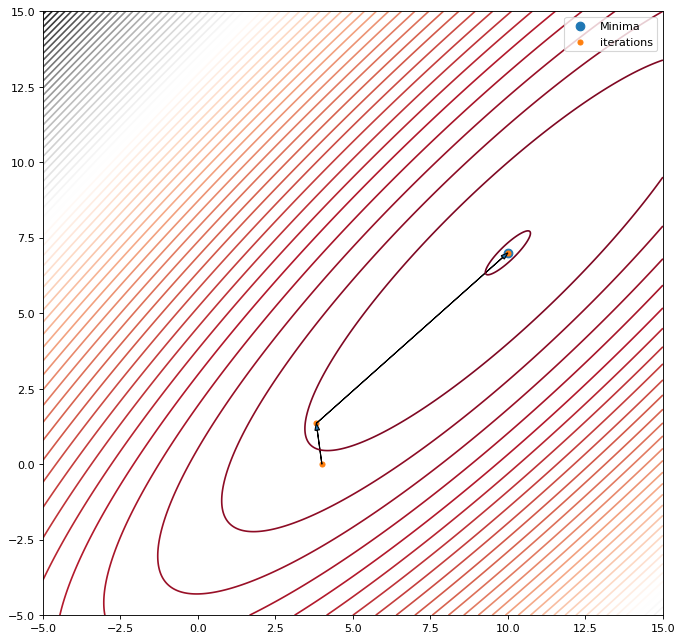

In [67]:
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1], s = 60)
plt.scatter(xarr3[:,0], xarr3[:,1], s = 20)
for i in range(xarr3[:,0].shape[0]-1):
    plt.arrow(xarr3[i,0], xarr3[i,1], xarr3[i+1,0] -xarr3[i,0]  ,xarr3[i+1,1] -xarr3[i,1], head_width=0.15 , length_includes_head = True)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters3.pdf")

## Q 2
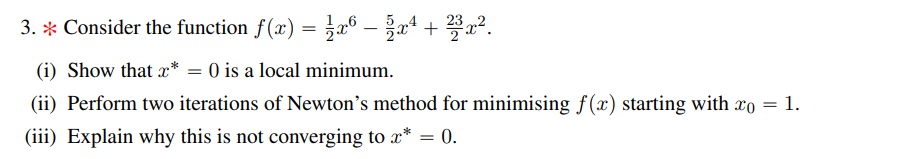

In [76]:
def fx(x):
    return 1/2*x**6-5/2*x**4+23/2*x**2


def dfx(x):
    return 3*x**5-10*x**3+23*x


def ddfx(x):
    return 15*x**4-30*x**2+23

In [87]:
xiters = []
x0 = 1
iters = 0
while np.absolute(dfx(x0)) >= 1e-16 and iters <10:
    xk = x0 - dfx(x0)/ddfx(x0)
    xiters.append(xk)
    x0 = xk
    iters = iters+1

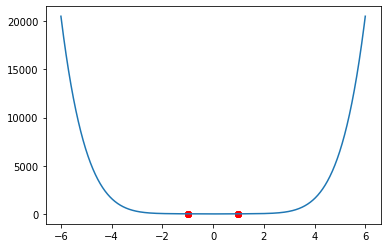

In [89]:
plt.figure()
x = np.linspace(-6,6,1000)
plt.plot(x, fx(x))
plt.scatter(xiters,[fx(i) for i in xiters], color = 'red')
plt.show()

## Question 4
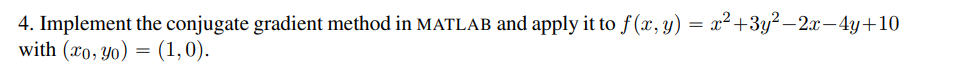

In [98]:
Q = np.array([[1,0],[0, 3]])
b = np.array([2, 4])
b = b.reshape(2,1)
x0 = np.array([1,0])
x0 = x0.reshape(2,1)
xk = x0
xarr3 = [x0]
d = -((Q@xk - b)).reshape(2,1)
grdf = d
while np.linalg.norm(d) >= 1e-10:
    a0 = ((grdf.T@grdf)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    gradfk = (Q@xk_1 - b).reshape(2,1)
    bta = ((gradfk.T@Q@d)/(d.T@Q@d))[0][0]
    dk = -gradfk + bta*d
    xarr3.append(xk_1)
    xk = xk_1
    d = dk
    grdf = gradfk

xarr3= np.array(xarr3).squeeze()

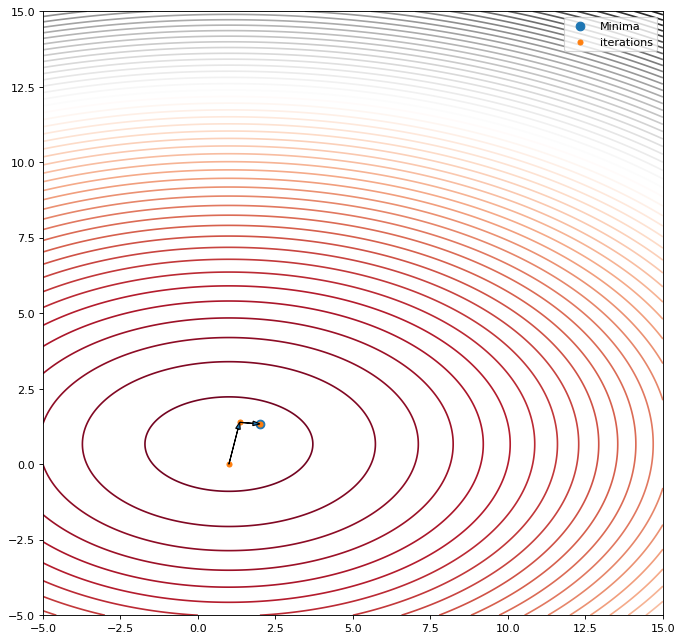

In [99]:
x_opt = np.linalg.inv(Q)@b
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = x**2 +3*y**2-2*x-4*y + 10
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(x_opt[0],x_opt[1], s = 60)
plt.scatter(xarr3[:,0], xarr3[:,1], s = 20)
for i in range(xarr3[:,0].shape[0]-1):
    plt.arrow(xarr3[i,0], xarr3[i,1], xarr3[i+1,0] -xarr3[i,0]  ,xarr3[i+1,1] -xarr3[i,1], head_width=0.15 , length_includes_head = True)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters4.pdf")

### Q 7
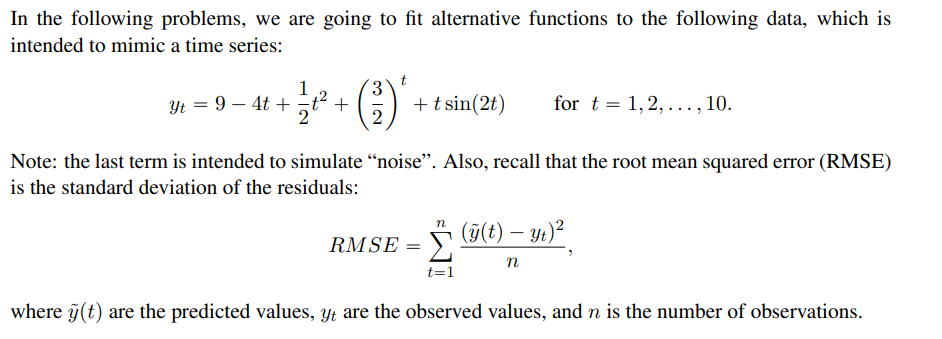

#### a)


In [166]:
def yt(t):
    return 9-4*t+1/2*t**2 + (3/2)**t + t*np.sin(2*t)

t = np.linspace(0,10,11)
y = yt(t)
num = t.shape[0]

In [167]:
X = np.stack((np.ones((num)), t.T, (t.T)**2)).T
coef = np.linalg.inv(X.T@X)@X.T@y
tnew = np.linspace(0,11,12)
ybar = coef[0] + coef[1]*tnew + coef[2]*tnew**2
ynew = yt(tnew)
coef

array([14.19057001, -8.67332881,  1.47275029])

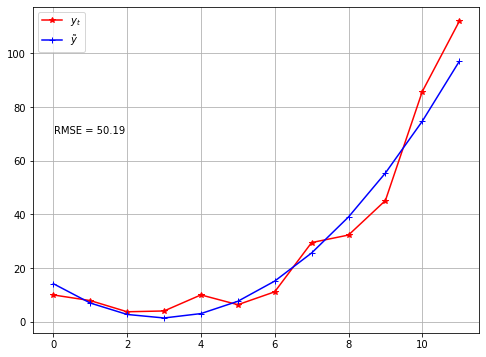

In [170]:
plt.figure(figsize = (8,6))
plt.plot(tnew,ynew, "r-*")
plt.grid("True")
plt.plot(tnew,ybar, "b-+")
plt.legend([r"$y_t$", r"$\tilde{y}$"])
RMSE = np.dot(ybar-ynew, ybar -ynew)/(num+1)
plt.text(0.01,70, "RMSE = {:.2f}".format(RMSE), fontsize = 10)
plt.show()

### Q 8 
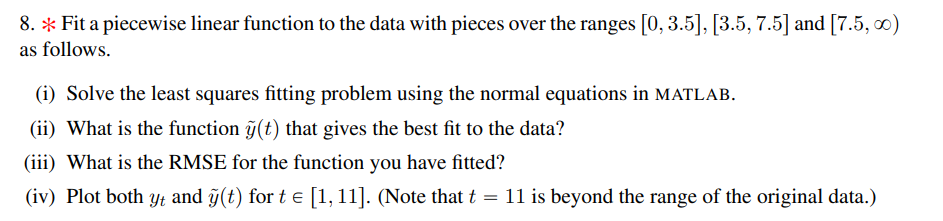

In [205]:
X = np.stack((np.maximum(np.zeros((1,t.shape[0])),t-3.5).squeeze(), np.maximum(np.zeros((1,t.shape[0])), t - 7.5).squeeze(), np.ones((1,t.shape[0])).squeeze(), t)).T
coeff = np.linalg.pinv(X.T@X)@X.T@y
coeff

array([ 6.42234387, 18.07696587,  9.31169088, -1.72818774])

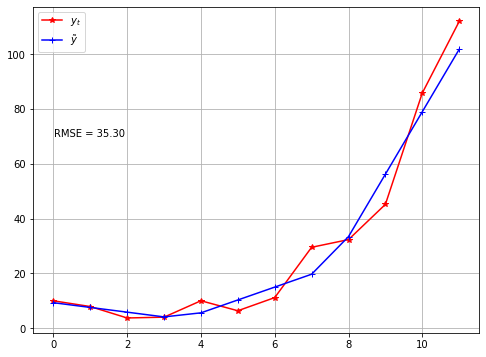

In [215]:
def ybar(t):
    X = np.stack((np.maximum(np.zeros((1,t.shape[0])),t-3.5).squeeze(), np.maximum(np.zeros((1,t.shape[0])), t - 7.5).squeeze(), np.ones((1,t.shape[0])).squeeze(), t)).T
    return coeff@X.T

ybar1 = ybar(tnew)
plt.figure(figsize = (8,6))
plt.plot(tnew,ynew, "r-*")
plt.grid("True")
plt.plot(tnew,ybar(tnew), "b-+")
plt.legend([r"$y_t$", r"$\tilde{y}$"])
RMSE = np.dot(ybar1-ynew, ybar1 -ynew)/(num+1)
plt.text(0.01,70, "RMSE = {:.2f}".format(RMSE), fontsize = 10)
plt.show()

### Q 9
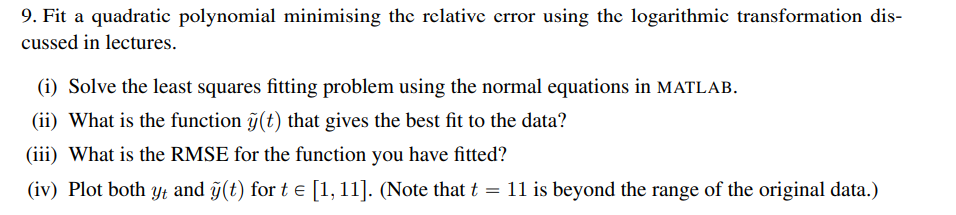